<a href="https://colab.research.google.com/github/SarthakJangade/DataSciencetasks/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [5]:
data=pd.read_csv("Iris.csv")

In [6]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 6)

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
data1=data.groupby("Species")

In [13]:
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f7519de0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f751b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0f7518790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc12f6d2bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f71e2e00>],
 'means': []}

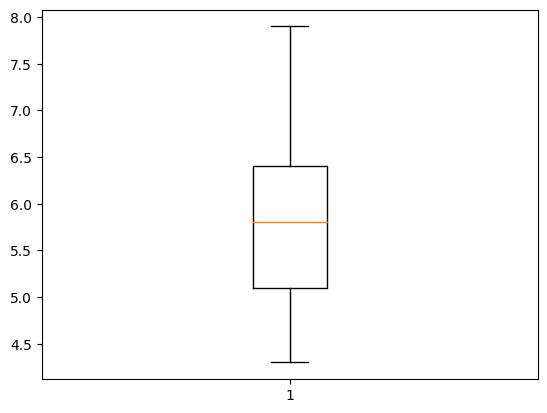

In [15]:
plt.boxplot(data['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f500b610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f500bb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0f500b370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f503c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f503c370>],
 'means': []}

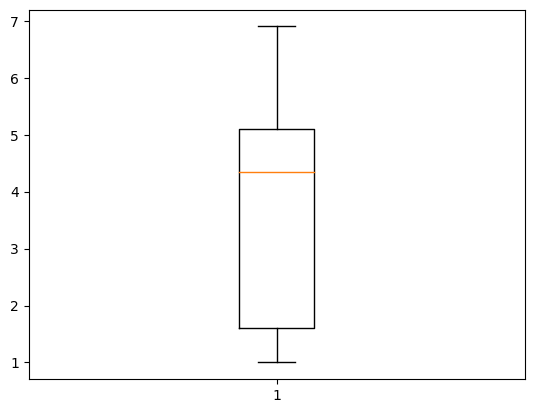

In [16]:
plt.boxplot(data['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f5082860>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f5082da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0f50825c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f50832e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f5083580>],
 'means': []}

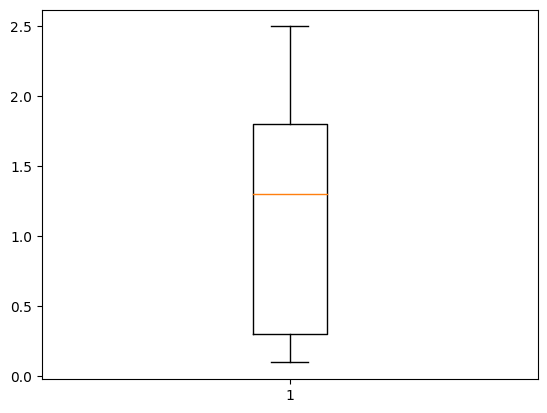

In [17]:
plt.boxplot(data['PetalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f4f15720>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f4f15c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0f4f15480>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f4f161a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f4f16440>],
 'means': []}

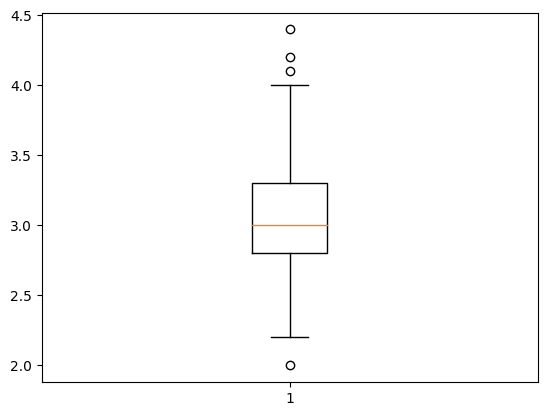

In [18]:
plt.boxplot(data['SepalWidthCm'])

In [19]:
x=pd.DataFrame(data,columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]).values

In [20]:
x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Droping unneccesary columns.

In [21]:
data.drop('Id',axis=1,inplace=True)

#Converting the categorical data into numerical format

In [22]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [23]:
data.Species=[sp[i] for i in data.Species]

In [24]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [25]:

y=data.Species.values.reshape(-1,1)

In [26]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

#Dividing the data into the train and test datasets

In [27]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=20)

In [28]:
X_train.shape

(100, 4)

In [29]:
y_train.shape

(100, 1)

#Applying the Linear Regression model to our data

In [30]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [31]:
model.score(x,y)

0.9304223675331595

#Making predictions of the model according to our data set.

In [32]:
Y_pred=model.predict(X_test)

In [33]:
print(Y_pred)

[[0.98548459]
 [2.19756726]
 [2.13040963]
 [2.56166273]
 [1.97673409]
 [2.17877271]
 [3.04633725]
 [1.0531726 ]
 [2.76063251]
 [0.91139498]
 [2.74623857]
 [2.2654272 ]
 [2.48615432]
 [0.89618773]
 [0.91079163]
 [2.96389898]
 [0.89816529]
 [2.17656176]
 [3.05316319]
 [1.90717243]
 [2.20308259]
 [2.66740449]
 [2.73219558]
 [0.95694375]
 [2.41725961]
 [1.93212811]
 [1.87368909]
 [0.91869693]
 [3.00441822]
 [2.44938775]
 [2.11911506]
 [2.16837848]
 [0.91734173]
 [0.94946987]
 [1.00008849]
 [2.60207593]
 [2.38055451]
 [0.96141024]
 [2.2845166 ]
 [2.79963117]
 [2.25705298]
 [2.53269542]
 [0.91869693]
 [2.17232866]
 [2.39745639]
 [0.95181031]
 [1.05680235]
 [0.93716396]
 [2.81075169]
 [1.13954911]]


#Making Evaluation of the predicted value - leads to accuracy of the model in the classification of iris species

In [34]:
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test) ** 2))

Mean squared error: 0.05


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.9193602675565695